### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [5]:
data = pd.read_csv('data/coupons.csv')

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [7]:
print(data.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
# Based on the initial inspection, the car column is largely empty and the frequency columns have minor missing values.

# Drop the 'car' column due to high missing values
df = data.drop(columns=['car'])

# Drop rows with missing values in frequency columns to ensure analysis accuracy
df = df.dropna().reset_index(drop=True)

# Verify the shape after cleaning
print(f"Cleaned data shape: {df.shape}")

Cleaned data shape: (12079, 25)


4. What proportion of the total observations chose to accept the coupon?



In [9]:
# General Acceptance Rate
# The goal is to calculate the proportion of total observations that accepted the coupon (Y=1)
# Y = 1 (Accept immediately, choose to accept and use before the coupon expires)

total_acceptance_rate = df['Y'].mean()
print(f"Total Coupon Acceptance Rate: {total_acceptance_rate:.2%}")


Total Coupon Acceptance Rate: 56.93%


5. Use a bar plot to visualize the `coupon` column.

Cheap Restaurants, Coffee_House and Carry_Out have the highest turnover for coupon usages


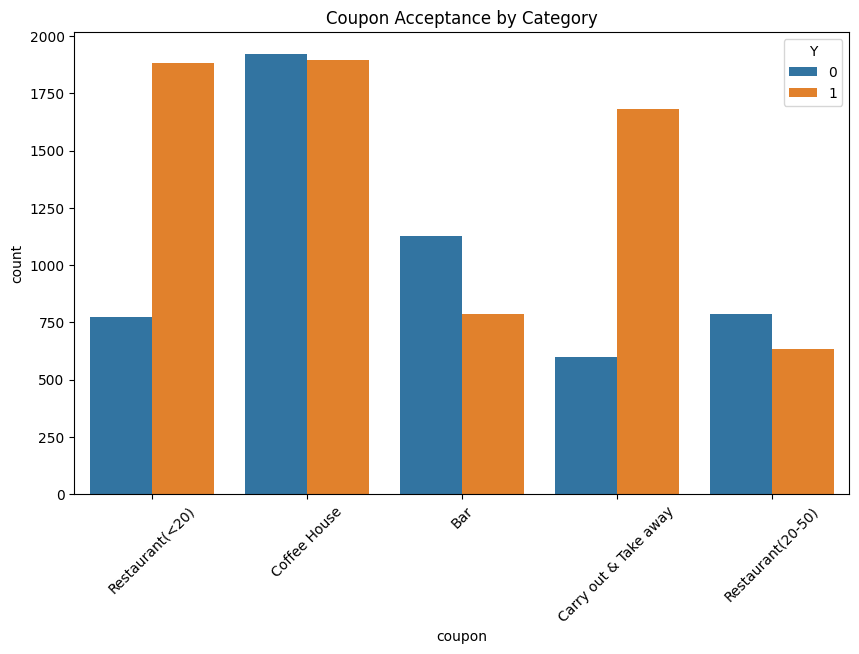

In [10]:
# General Visualization

# Bar plot for the 'coupon' column to see distribution by category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='coupon', hue='Y')
plt.title('Coupon Acceptance by Category')
plt.xticks(rotation=45)
print("Cheap Restaurants, Coffee_House and Carry_Out have the highest turnover for coupon usages")
plt.show()



6. Use a histogram to visualize the temperature column.

Higher temperatures has a direct correlation with coupon usage


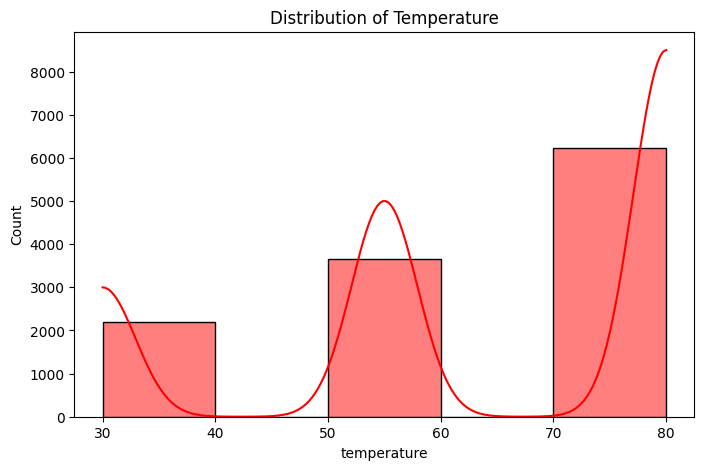

In [11]:
# Histogram for the 'temperature' column
plt.figure(figsize=(8, 5))
sns.histplot(df['temperature'], bins=5, kde=True, color='red')
plt.title('Distribution of Temperature')
print("Higher temperatures has a direct correlation with coupon usage")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
# Bar Coupon Analysis

# Create a New DataFrame for Bar coupons only
bar_df = df[df['coupon'] == 'Bar'].copy()
bar_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
13,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12058,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12059,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12062,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12065,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [13]:
# 2. Bar Coupon Acceptance Rate
print(f"Bar Acceptance Rate: {bar_df['Y'].mean():.2%}")

Bar Acceptance Rate: 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [14]:
# 3. Comparison: Bar <= 3 times/month vs > 3 times/month
low_freq = ['never', 'less1', '1~3']
high_freq = ['4~8', 'gt8']

rate_low = bar_df[bar_df['Bar'].isin(low_freq)]['Y'].mean()
rate_high = bar_df[bar_df['Bar'].isin(high_freq)]['Y'].mean()
print(f"Acceptance Low number of visits (<= 3 visits): {rate_low:.2%}")
print(f"Acceptance High number of visits (> 3 visits): {rate_high:.2%}")
print("Coupon acceptance is high (almost double) with frequent visitors")

Acceptance Low number of visits (<= 3 visits): 37.27%
Acceptance High number of visits (> 3 visits): 76.17%
Coupon acceptance is high (almost double) with frequent visitors


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [15]:
# 4. Comparison: (Bar > 1 time/month AND Age > 25) vs Others
frequent_bar = ['1~3', '4~8', 'gt8']
young_ages = ['21', 'below21']

mask_q3 = (bar_df['Bar'].isin(frequent_bar)) & (~bar_df['age'].isin(young_ages))
print(f"Acceptance (Freq > 1, Age > 25): {bar_df[mask_q3]['Y'].mean():.2%}")
print(f"Acceptance (Others): {bar_df[~mask_q3]['Y'].mean():.2%}")
print("There is a difference observed. Drivers below age 25 who frequent more than 1 time a month are likely to visit more than others")

Acceptance (Freq > 1, Age > 25): 68.98%
Acceptance (Others): 33.77%
There is a difference observed. Drivers below age 25 who frequent more than 1 time a month are likely to visit more than others


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [16]:
# 5. Comparison: (Bar > 1, No Kid Passengers, Not in Farming/Fishing/Forestry)
mask_q4 = (bar_df['Bar'].isin(frequent_bar)) & \
          (bar_df['passanger'] != 'Kid(s)') & \
          (bar_df['occupation'] != 'Farming Fishing & Forestry')
print(f"Acceptance (Freq > 1, No Kids, Not Farming): {bar_df[mask_q4]['Y'].mean():.2%}")
print("This category of drivers have the highest acceptance rate for COUPONS than others")

Acceptance (Freq > 1, No Kids, Not Farming): 70.94%
This category of drivers have the highest acceptance rate for COUPONS than others


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [17]:
# Category groups for filtering
frequent_bar = ['1~3', '4~8', 'gt8']
age_under_30 = ['below21', '21', '26']
cheap_restaurant_4plus = ['4~8', 'gt8']
income_under_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

# Group 1: Bar > 1, non-kid passenger, not widowed
grp1_mask = (bar_df['Bar'].isin(frequent_bar)) & \
            (bar_df['passanger'] != 'Kid(s)') & \
            (bar_df['maritalStatus'] != 'Widowed')
rate_grp1 = bar_df[grp1_mask]['Y'].mean()

# Group 2: Bar > 1 and age < 30
grp2_mask = (bar_df['Bar'].isin(frequent_bar)) & \
            (bar_df['age'].isin(age_under_30))
rate_grp2 = bar_df[grp2_mask]['Y'].mean()

# Group 3: cheap restaurants > 4 and income < 50K
grp3_mask = (bar_df['RestaurantLessThan20'].isin(cheap_restaurant_4plus)) & \
            (bar_df['income'].isin(income_under_50k))
rate_grp3 = bar_df[grp3_mask]['Y'].mean()

# Print results
print(f"Acceptance Rate Group 1: {rate_grp1:.2%}")
print(f"Acceptance Rate Group 2: {rate_grp2:.2%}")
print(f"Acceptance Rate Group 3: {rate_grp3:.2%}")
print("Group2, Drivers under 25 and frequent more than once to the bar, continue to be the highest % of coupon users")

Acceptance Rate Group 1: 70.94%
Acceptance Rate Group 2: 71.95%
Acceptance Rate Group 3: 45.65%
Group2, Drivers under 25 and frequent more than once to the bar, continue to be the highest % of coupon users


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Recommendation: 
1. The most effective strategy for `Bar coupons` is targeting `younger drivers (under 30)` `without kids` who already visit bars at least once a month. 
2. Targeting based on restaurant habits and income alone is roughly $25\%$ less effective than targeting based on bar-going frequency and age.
3. Being a frequent "cheap restaurant" goer with a lower income does not strongly correlate with bar coupon acceptance compared to those who already have a habit of visiting bars.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset for Coffee House coupons
coffee_df = df[df['coupon'] == 'Coffee House'].copy()
coffee_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
6,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
8,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12051,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12054,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12069,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12070,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


Acceptance rate is high with drivers with Friends and or a partner


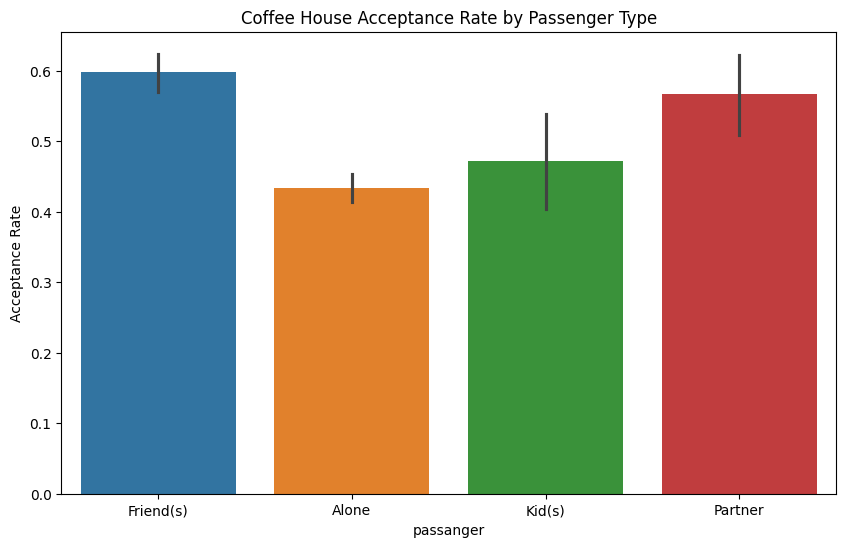

In [19]:
# Analyze Acceptance by Passenger Type
plt.figure(figsize=(10, 6))
sns.barplot(data=coffee_df, x= 'passanger', hue='passanger', y='Y', legend=False)
plt.title('Coffee House Acceptance Rate by Passenger Type')
plt.ylabel('Acceptance Rate')
plt.savefig('coffee_passenger.png')
print("Acceptance rate is high with drivers with Friends and or a partner")

Late Morning and Afternoon (10 AM and 2PM) have the highest coupon usage


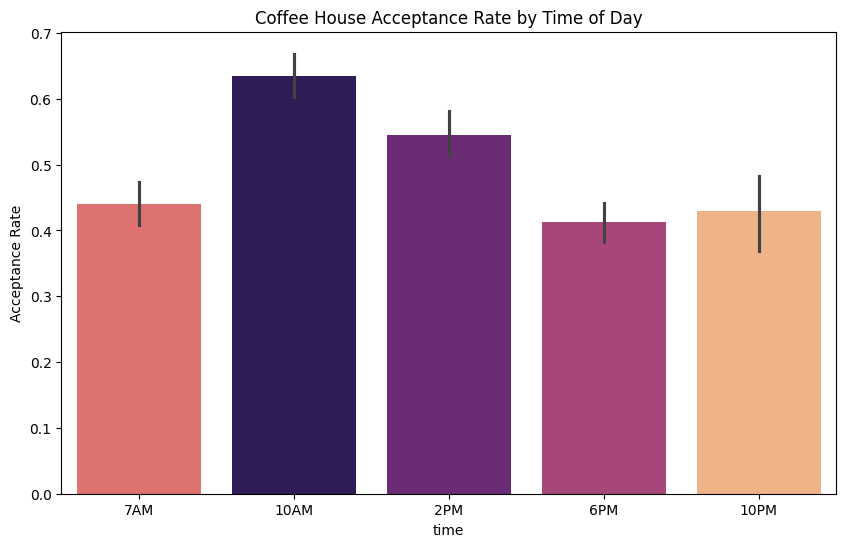

In [20]:
# Analyze Acceptance by Time of Day
plt.figure(figsize=(10, 6))
time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']
sns.barplot(data=coffee_df, x='time', y='Y', hue='time', order=time_order, palette='magma', legend = False)
# sns.barplot(data=coffee_df, x='time', y='Y', order=time_order, palette='magma')
plt.title('Coffee House Acceptance Rate by Time of Day')
plt.ylabel('Acceptance Rate')
plt.savefig('coffee_time.png')
print("Late Morning and Afternoon (10 AM and 2PM) have the highest coupon usage")

Drivers who frequent more than once are highly likely to use the Coffee_House coupon


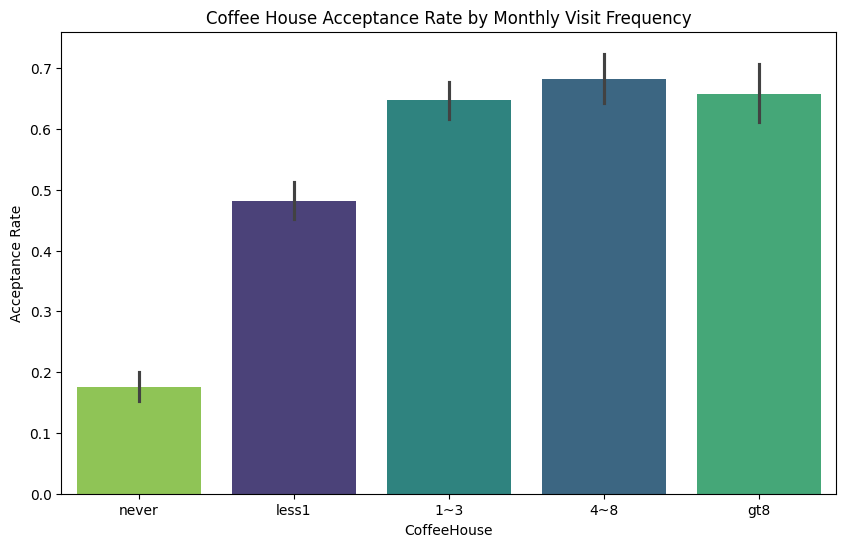

In [21]:
# 4. Analyze Acceptance by  Frequency of visits to Coffee Shop (CoffeeHouse column)
plt.figure(figsize=(10, 6))
freq_order = ['never', 'less1', '1~3', '4~8', 'gt8']
sns.barplot(data=coffee_df, x='CoffeeHouse', y='Y', order=freq_order, palette='viridis', hue='CoffeeHouse', legend = False)
plt.title('Coffee House Acceptance Rate by Monthly Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.savefig('coffee_habit.png')
print("Drivers who frequent more than once are highly likely to use the Coffee_House coupon")

In [22]:
# Define a "High Probability" Target Segment
# Criteria: Visits coffee houses > 1/month, Sunny weather, and No Urgent Destination
frequent_coffee = ['1~3', '4~8', 'gt8']
high_prob_mask = (coffee_df['CoffeeHouse'].isin(frequent_coffee)) & \
                 (coffee_df['weather'] == 'Sunny') & \
                 (coffee_df['destination'] == 'No Urgent Place')

high_prob_rate = coffee_df[high_prob_mask]['Y'].mean()

In [23]:
# Statistical Summaries
print(f"Overall Coffee House Acceptance Rate: {coffee_df['Y'].mean():.2%}")
print(f"High-Probability Segment Acceptance Rate: {high_prob_rate:.2%}")
print("Drivers who frequent more than once are highly likely to use the Coffee_House coupon")

Overall Coffee House Acceptance Rate: 49.63%
High-Probability Segment Acceptance Rate: 74.40%
Drivers who frequent more than once are highly likely to use the Coffee_House coupon


In [24]:
# Top 5 occupations by acceptance rate
top_occupations = coffee_df.groupby('occupation')['Y'].mean().sort_values(ascending=False).head(5)
print("\nTop 5 Occupations for Coffee House Acceptance:", top_occupations.map('{:.2%}'.format))



Top 5 Occupations for Coffee House Acceptance: occupation
Healthcare Practitioners & Technical         76.06%
Building & Grounds Cleaning & Maintenance    72.73%
Transportation & Material Moving             61.84%
Healthcare Support                           61.54%
Student                                      61.47%
Name: Y, dtype: object


#### Summary of the "Ideal" Coffee House Target: 

1. A driver is highly likely **(74.40% acceptance)** to accept a Coffee House coupon if they meet the following criteria: 
   -  They are already a frequent coffee house visitor (at least once a month).
   -  The weather is sunny.
   -  They are not in a rush (destination is "No Urgent Place").

2. To maximize usage of `Coffee-coupons`, the marketing engine / platform  should prioritize the delivery of `coffee-coupons` to groups of friends or couples during the : 
- mid-morning (10 AM) window, 
- specifically targeting those who have a 1-day window to redeem the coupon, rather than a short 2-hour window.

## End of Notebook